In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Importing the dataset

1. Since the data is in the form of an excel file, we have to use pandas read_excel to load the data
2. After loading, it is important to check the complete information of data as it can indicate a lot of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. Moreover, if it is present then the following can be done,
    ##### A. Imputing the data using Imputation method in sklearn
    ##### B. Filling NaN values with mean, median and mode using fillna() method
    
4. Describe the data --> which can give the statistical analysis

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
28h 30m      1
41h 20m      1
19h 50m      1
5m           1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

## EDA

From the description, we can observe that the Date_of_Journey is an object data type,\ Therefore, we have to convert this datatype into timestamp in order to use this column properly for the prediction

For this, we require pandas to_datetime to convert this object data type to datetime dtype.

**.dt.day method will extract only the day part of that date**\ **.dt.month method will extract only the month part of that date**

In [10]:
train_data['Journey_Day']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [11]:
train_data['Journey_Month']=pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# The Departure time is when a plane is scheduled to depart. 
# Similar to Date_of_Journey, we can extract the values from Dep_Time

# Extracting Hours

train_data['Departure_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

# Extracting Minutes

train_data['Departure_minutes']=pd.to_datetime(train_data['Dep_Time']).dt.minute

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Arrival time is when the plane is scheduled to arrive at the airport.
# Similar to Date_of_Journey we can extract the values from Arrival_Time

# Extracting Hours

train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

# Extracting Hours

train_data['Arrival_minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [18]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2 :  # check whether the value contains hour or minutes
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'   # Adds 0 minutes
        elif 'm' in duration[i]:
            duration[i]= '0h ' + duration[i]          # Adds 0 hours
    
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))
        

In [19]:
train_data['duration_hours']=duration_hours
train_data['duration_minutes']=duration_minutes

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [21]:
train_data_2=train_data.copy()

In [22]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data_2.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [23]:
train_data_2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical data

#### One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case.

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case.

In [24]:
 train_data_2['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

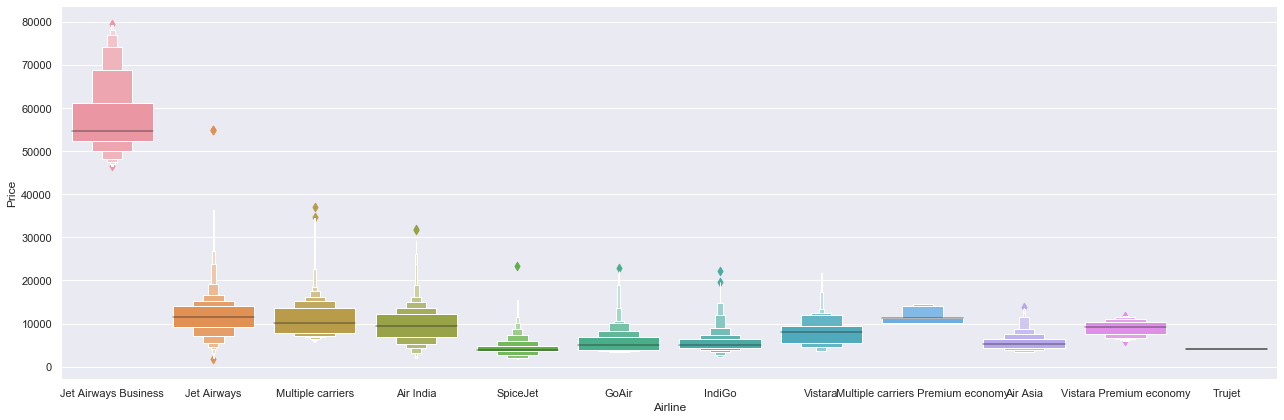

In [25]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price

sns.catplot(x='Airline',y='Price',data=train_data_2.sort_values(by='Price',ascending=False),kind='boxen',height=6,aspect=3)


In [26]:
# As Airline is nominal Categorical data, we will do Onehotencoding

Airline=train_data_2[['Airline']]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data_2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
train_data_2['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

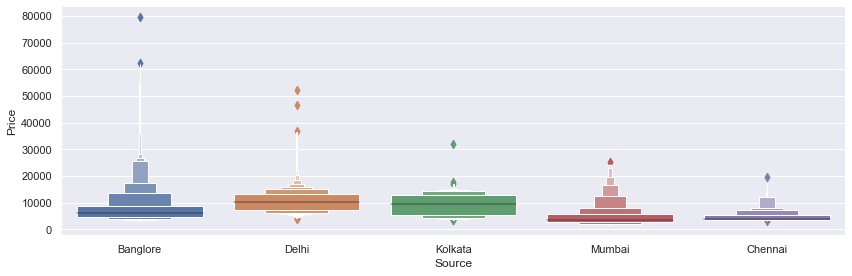

In [29]:
# Bangalore has the highest price
# Source vs price

sns.catplot(y='Price',x='Source',data=train_data_2.sort_values('Price',ascending=False),aspect=3,height=4,kind='boxen')

In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source=train_data_2[['Source']]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data_2['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

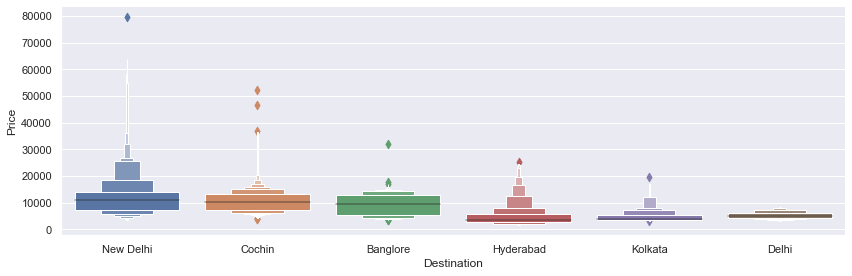

In [32]:
# Destination Vs price

sns.catplot(y='Price',x='Destination',data=train_data_2.sort_values('Price',ascending=False),aspect=3,height=4,kind='boxen')

In [33]:
Destination= train_data_2[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data_2['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JDH → JAI → DEL → HYD       1
BOM → CCU → HYD                   1
BOM → RPR → VTZ → HYD             1
BOM → DED → DEL → HYD             1
CCU → IXZ → MAA → BLR             1
Name: Route, Length: 128, dtype: int64

In [35]:
train_data_2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
# Route and total_stops are related to each other.

In [37]:
# As total_stops contain ordinal categorical value, Labelencoder will be used in this case
# Here Values are assigned with corresponding keys


train_data_2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [38]:
train_data_2.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [39]:
train_data_3=pd.concat([train_data_2,Airline,Source, Destination],axis=1)

In [40]:
train_data_3.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
## Now, we can remove columns: Airline, Source, Destination, Route.
## We're removing routes column because we have used Total_stops to signify the number of routes any airline has taken.
## We can also remove column: Additional_info; as it contains 80% no info.

train_data_3.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

In [42]:
train_data_3.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
train_data_3.shape

(10682, 30)

## **------------------------------------------------------------------------------------------------------------------------------**

## Test Set

##### To prevent Data leakage, which causes overfitting, we're doing separate Data preprocessing for the test dataset

In [44]:
test_data=pd.read_excel('Test_set.xlsx')

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [49]:
test_data['Journey_Day']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_Month']=pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [50]:
test_data['Departure_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Departure_minutes']=pd.to_datetime(test_data['Dep_Time']).dt.minute


In [51]:
test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minutes']=pd.to_datetime(test_data['Arrival_Time']).dt.minute


In [52]:
duration_2=list(test_data['Duration'])

for i in range(len(duration_2)):
    
    if len(duration_2[i].split())!= 2 :
        if 'h' in duration_2[i]:
            duration_2[i]=duration_2[i].strip() + ' 0m'
        elif 'm' in duration_2[i]:
            duration_2[i]= '0h ' + duration_2[i].strip()
            
duration_hours=[]
duration_minutes=[]

for i in range(len(duration_2)):
    duration_hours.append(int(duration_2[i].split('h')[0]))
    duration_minutes.append(int(duration_2[i].split('m')[0].split()[-1]))
    

In [53]:
test_data['duration_hours']=duration_hours
test_data['duration_minutes']=duration_minutes

In [54]:
test_data.shape

(2671, 18)

In [55]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


#### Categorical columns

In [56]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [57]:
Airline=test_data[['Airline']]

Airline=pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [58]:
Source=test_data[['Source']]

Source=pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [59]:
Destination=test_data[['Destination']]

Destination=pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [60]:
test_data['Route']

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2671, dtype: object

In [61]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [62]:
test_data_2=test_data.copy()

In [63]:
## Applying Labelencoding to total_stops as it is an ordinal categorical column

test_data_2.replace({'non-stop':0 , '1 stop':1 , '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [64]:
test_data_2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6,23,55,2,45,2,50


In [65]:
test_data_3=pd.concat([test_data_2,Airline,Source,Destination], axis=1)

In [66]:
test_data_3.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time','Arrival_Time','Duration','Additional_Info'], axis=1, inplace=True)

In [67]:
test_data_3.head()

,Total_Stops,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minutes,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
test_data_3.shape

(2671, 28)

# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**1.heatmap**

**2.feature_importance_**

**3.SelectKBest**

In [69]:
train_data_3.shape

(10682, 30)

In [70]:
train_data_3.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Departure_hour', 'Departure_minutes', 'Arrival_hour', 'Arrival_minute',
       'duration_hours', 'duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [71]:
X=train_data_3.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_Day,Journey_Month,Departure_hour,Departure_minutes,Arrival_hour,Arrival_minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
y=train_data_3.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

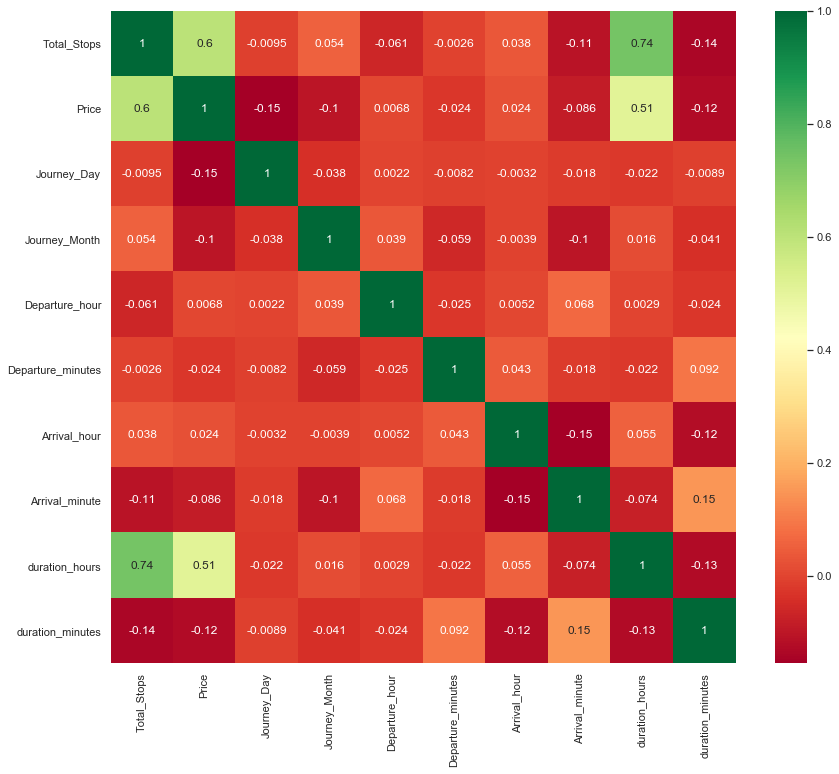

In [73]:
# Finds correlation b/w independent and dependent variables

plt.figure(figsize=(14,12))

sns.heatmap(train_data_2.corr(),annot=True, cmap='RdYlGn')

In [74]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

etr_selection=ExtraTreesRegressor()

etr_selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [75]:
print(etr_selection.feature_importances_)

[2.29561981e-01 1.42078516e-01 5.45037515e-02 2.50392018e-02
 2.16270709e-02 2.80003197e-02 1.90696382e-02 1.15160758e-01
 1.69638337e-02 9.60285800e-03 1.86789287e-03 1.84309022e-02
 1.43761056e-01 6.78880990e-02 1.84744316e-02 8.90406435e-04
 3.14547827e-03 1.19281270e-04 4.81164429e-03 8.89500584e-05
 4.35181744e-04 8.24954148e-03 3.30559815e-03 6.93481408e-03
 1.31706039e-02 1.48518429e-02 6.39221083e-03 4.91211053e-04
 2.50829253e-02]


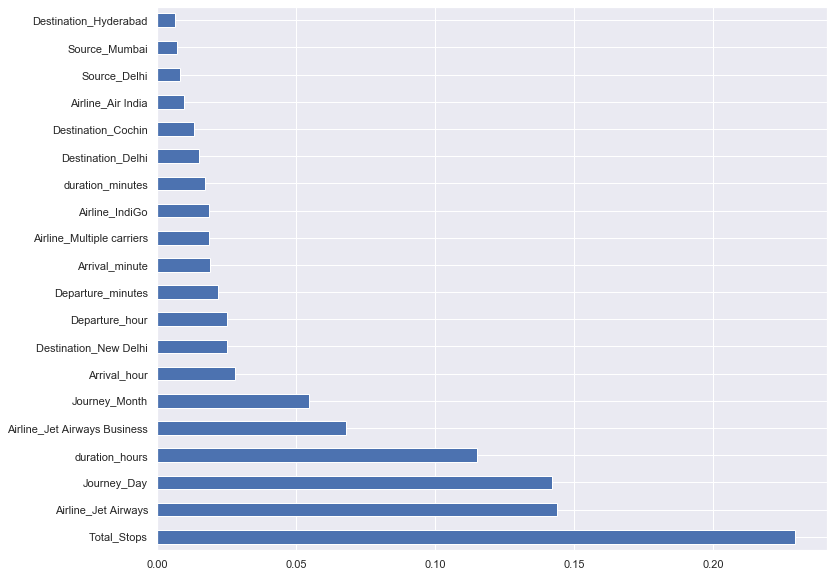

In [76]:
plt.figure(figsize=(12,10))
feats_importance=pd.Series(etr_selection.feature_importances_,index=X.columns)

feats_importance.nlargest(20).plot(kind='barh')


# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data

   **Scaling is not done in Random forest**
   
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

**The most common interpretation of r-squared is how well the regression model fits the observed data. For example, an r-squared of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.**


In [77]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
rf_model.score(X_train,y_train)

0.9548464392208598

In [80]:
prediction_1=rf_model.predict(X_test)

In [81]:
rf_model.score(X_test,y_test)

0.8039989854062288

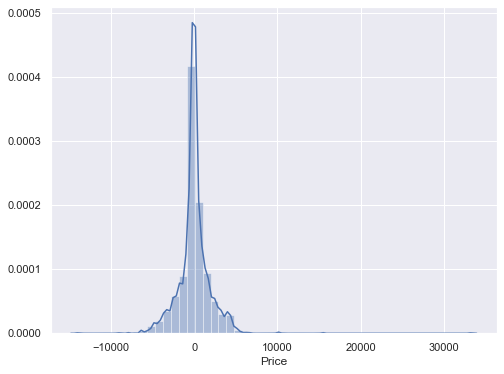

In [82]:
plt.figure(figsize=(8,6))
sns.distplot(y_test-prediction_1)

Text(0, 0.5, 'prediction_1')

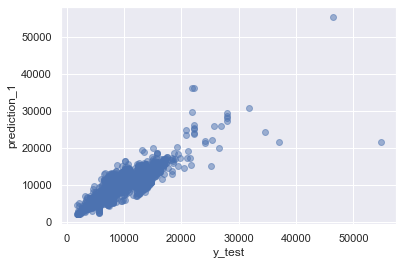

In [86]:
plt.scatter(y_test,prediction_1,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction_1')

In [87]:
from sklearn import metrics 

In [88]:
print('MAE', metrics.mean_absolute_error(y_test,prediction_1))
print('MSE', metrics.mean_squared_error(y_test,prediction_1))
print('MAE', np.sqrt(metrics.mean_squared_error(y_test,prediction_1)))

MAE 1210.0305863981464
MSE 4020116.130217133
MAE 2005.022725611142


In [89]:
# RMSE/(max(DV)-min(DV))

2005.022725611142/(max(y)-min(y))

0.025787078641481897

In [90]:
metrics.r2_score(y_test,prediction_1)

0.8039989854062287

# Hyperparameter Tuning

1. Choose following method for hyperparameter tuning
    
    RandomizedSearchCV --> Fast
    
    GridSearchCV
    
    
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
#Randomized Search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,20]

# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]



In [93]:
param_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [94]:
rscv_model=RandomizedSearchCV(rf_model,param_distributions=param_grid,n_iter=10,scoring='neg_mean_squared_error',
                              cv=5,verbose=2,random_state=1,n_jobs=1)

In [95]:
rscv_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  10.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  10.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  10.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  10.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=15, total=  12.1s
[CV] n_estimators=800, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=800, min_samples_split=20, min_samples_leaf=10, max_features=auto, max_depth=5, total=  10.8s
[CV] n_estimators=800, min_samples_split=20

[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.6s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.1s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   1.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=30, total=   1.9s
[CV] n_estimators=100, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [96]:
rscv_model.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [97]:
rscv_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [99]:
prediction_2=rscv_model.predict(X_test)

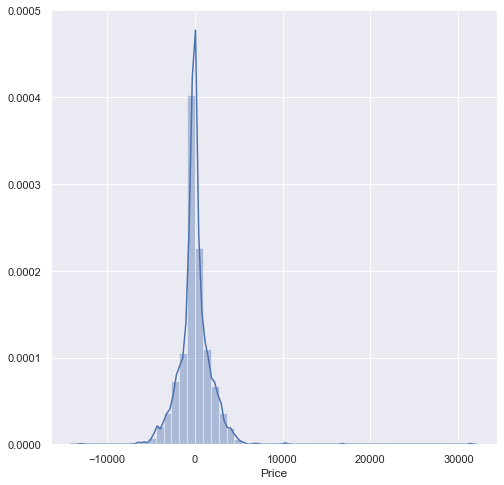

In [102]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction_2)
plt.show()

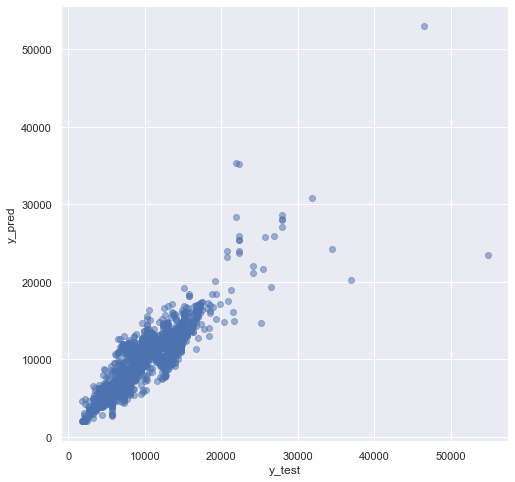

In [103]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction_2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [104]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_2))
print('MSE:', metrics.mean_squared_error(y_test, prediction_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_2)))

MAE: 1166.5623734468468
MSE: 3517436.8341852627
RMSE: 1875.4830935482364


# Save the model to reuse it again

In [105]:
import pickle

# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rscv_model, file)

In [106]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [107]:
y_prediction = forest.predict(X_test)

In [108]:
metrics.r2_score(y_test, y_prediction)

0.8285071460777483